# CISC 873 Data Mining Competition #1
name: Asmaa Qindeel
code: 21aaae1

# TOPICS:
* [Questions & Answers](#Questions)
* [Introduction to problem](#intro)
* [**Abstract**](#abst)

**Code Part**

* [Data Cleaning](#data1)
* [Data Analysis](#data2)
* [Data Preprocessing](#data3)
* [Trail 0: Naive Bayes ](#t0)
* [Trail 1: Decision  Trees ](#t1)
* [Trail 2: Decesion Trees with Features selection](#t2)
* [Trail 3: SVM then Grid search ](#t3)
* [more trials](#t6)
* [more:Bagging and Stacking](#more)

**vision**

* [Vision: Data Resampling](#Resample_data)

# Questions:  <a class="anchor" id="Questions"></a>
1- Why Data Mining is a misnomer? What is another preferred name?
* because we are not digging for more data or more row of useless numbers, but for something more meaningfull and usefull to us. Basically data with depth a.k.a knowledge, the relations between data, connecting the dots, it is more critic and valuable than just random samples. So, **knowledge extraction** is a better name

2- What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
* I'm not sure what you mean in the first Q. 
* The data engineer is someone who takes care and manages the data as it is, doesn't try to chage it into anything deeper like knowledge. The Data Scientist looks to extract something different from the data other than its view. in another word, the data engineer is more interested in th representation of data while the scientist takes interest in the behaviour of data. also Data engineering is a boring job, i used to do it.

3- In data mining, what is the difference between prediction and categorization?
* Prediction is futuristic knowledge -data i don't have yet- from current data, categorization is labeling what we already have.

4- Why data science/machine learning is a bad idea in the context of information security?
* applying Ds/ML on any sort of data could tell you critical information. it is basically like having a stalker recording every movement you make, every penny you spend. that is a privacy breach. what if this was used on secure information, like money movements, national payments, secret army sceduales, security systems!

5- What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
* confidentiality, integrity, and availability. by attacking confidentiality you can disclose Personal information, Proprietary information, Government classified information... by using attacks on the model (Information Leak, Reconstruct original Training set, Steal neural nets, membership inference). attacking on ntegrity level may lead to: Unauthorized transactions, Wrong execution of software, Corruption of data... using (adversarial attack, backdoor attacks). Attacking on the availability level may lead to: Denial of Service, Loss of Data.

# Problem Formulation:<a class="anchor" id="intro"></a>

The problem is multi-class classification, the input is various information about products and the output is 'rating', the predicted ratings of these products, ranging for 1:5.

Some of the challenges will be data visualization and analysis, the data is not clean, not direct, and it is filled with noise. Basically it is human-collected, more like a survey data, so it doesn't have any standards.
Another challenge will be coding, it will take time to get skilled with pandas and sklearn. But hopefully this will be the impact of this project, better coding skill.

## Impact:
The impact of the porblem it self lies within how wish.com would use their model? for better customer recomendation or for decieving customers, like we said Data mining couldbe used for evil causes.
Personal Impact: i really got better with python and pandas duringthis asignment. I also got many many seafood recipes because that was my study escape :D 


# Experimental Protocol:
## Preprocessing:
after cleaning, 

I applied label encoding on the categorical data for decision tree, 

I normalized for the SVM.

steps: 

    -new_model -fetch data specified for new_model -Train then test with hold out, take notes -re-train model over entire set -predict and save results -enhance model -start over with new model

---

# Results and Discussion(abstract): <a class="anchor" id="abst"></a>
The data is human gathered,so it was a challenge.

Naive Bayes was the worst model, it performed 0.4 average f1-score, because the data is unbalanced, dependent, and chaotic, while Naive assumes normal, independant, distributed data.

SVM was a better model, performed around 0.7 average f1_score with kernels(poly 3rd degree, rbf, and linear) which is understandable since the three configs are rather close to each other in our case. I used gridSearch to find the best config, it was poly of order 2 with penalty 0.7.

Decision trees are the most promising model, it was higher than 0.7 with max_depth=7, this means the problem can do better with less features.
## Feature Selection models:
* KBest model with chi2: adapted from [stackexchange](https://stats.stackexchange.com/)  features selected upgraded naive from 0.4 f1-score to 0.6.
* ExtraTreesClassifier **best model so far**  with 0.8 f1-score

## Ideal solution (Future Vision):
* My next tryout would be to make data balanced, i read an article called [Dealing with Imbalanced Data](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18).the process is to repeat random samples -make up data- for the low sampled-classes, like rate (1) it had only 2 sample points, and rate (2) it had 12 sample points, while rate (4) had over 400 sample points, this unbalanced data could make the model unbiased against the low sampled classes - except Decision trees i think, because it is not affected by the distribution of samples-

* Also, For the next solution/try, I thought to view the complete f1-score, separately for each class. I only viewed the *average f1-score* but then I observed certain classes kept getting low f1. I'm not sure what, but i would do something towards those classes' samples, really dig deep in the data.

# Before starting: Data cleaning and analysis. <a class="anchor" id="data0"></a>
*Idea*: visualize and understand the data using code, without actually seeing it, because human eye will not catch everything.  

In [1]:
import numpy as np
import pandas as pd

In [2]:
#load the data, train and test together for cleaning and preprocessing
train_file = pd.read_csv('train_new.csv', header = 0)
test_file = pd.read_csv('test_new.csv', header = 0)


#add dummy 'rating' value for the test_file to mask with it later.(To call the test samples alone)
# hint: i checked that 99 is not a false rating in the train file
test_file['rating'] = 99 

df = pd.concat([train_file, test_file]) 

#take a look at the data
print(train_file.shape ,test_file.shape, df.shape)
df.describe(include='all')

(1094, 34) (479, 34) (1573, 34)


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
count,1573.000000,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,...,1569,1572,1.573000e+03,1573.000000,1573,1573.000000,226,1573,1573,1573.000000
unique,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,957,1058,NaN,NaN,958,NaN,125,1,1,NaN
top,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,广州唯适唯服饰有限公司,"83 % avis positifs (32,168 notes)",NaN,NaN,558c2cdc89d53c4005ea2920,NaN,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,NaN
freq,NaN,NaN,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,14,NaN,NaN,15,NaN,12,1573,1573,NaN
mean,8.325372,23.288620,NaN,4339.005086,0.432931,32.933249,889.659250,0.105531,0.018436,0.074380,...,NaN,NaN,2.649583e+04,4.032345,NaN,0.143675,NaN,NaN,NaN,786.000000
std,3.932030,30.357863,NaN,9356.539302,0.495639,43.732794,1983.928834,0.340709,0.134565,0.262472,...,NaN,NaN,7.847446e+04,0.204768,NaN,0.350871,NaN,NaN,NaN,454.230301
min,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000e+00,2.333333,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,5.810000,7.000000,NaN,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,...,NaN,NaN,1.987000e+03,3.917353,NaN,0.000000,NaN,NaN,NaN,393.000000
50%,8.000000,10.000000,NaN,1000.000000,0.000000,4.000000,150.000000,0.000000,0.000000,0.000000,...,NaN,NaN,7.936000e+03,4.040650,NaN,0.000000,NaN,NaN,NaN,786.000000
75%,11.000000,26.000000,NaN,5000.000000,1.000000,99.000000,855.000000,0.000000,0.000000,0.000000,...,NaN,NaN,2.456400e+04,4.161797,NaN,0.000000,NaN,NaN,NaN,1179.000000


>notice the target 'rating' is not at the end column

>unique, top, freq are for categorical data.

#### Understanding how much is missing


In [3]:
# missing values per-column 
total = df.isnull().sum().sort_values(ascending=False)
total.nlargest(10)

merchant_profile_picture     1347
has_urgency_banner           1100
urgency_text                 1100
product_color                  41
origin_country                 17
product_variation_size_id      14
merchant_name                   4
merchant_info_subtitle          1
merchant_title                  0
price                           0
dtype: int64

## steps for cleaning: missing values handling <a class="anchor" id="data1"></a>
   
    1.rearrange keys make 'rating' at the end
    2.replace nan value: 
        A. in numeric features with random small number like 0.00125, this is because I'm afraid there is a categorical zero in the data that i can't see, so this way 0.00125 would be close to zero, so no significant effect, but doesn't change the distripution of other zero values.
        B. in Categorical features fillna with space " "
    3. remove redundant columns/features, that have only one value, so they are useless in the learning process
        3.b. feature selection: remove logically useless columns, like ('merchant_id', 'id', 'merchant_profile_picture', 'merchant_info_subtitle') i chose the last two by sense. First the picture can't be helpfull in the learning since we can't lock at it, and this is not CNN. "merchant_info_subtitle" I don't think it was a meaninglful data for the client who rated the product - 
*who rates based on merchant_info_subtitle?! a robot?*

    4.drop all Nan rows
    5.check and tweek the false data
    6. personal choice: turn 'tags' feature into len(tags)

#### now for the 'tags' feature, I figured it would contribute to the rating in two ways:
 1. Accuracy of it, i.e. having keywords on a product that actually describes it, not like having keyword= 'men clothing' on a 'dress'
 2. the length of the tags. Having several keywords on the product makes it easer to search for, hence better rating.
 > Now, since we can't measure the accuracy of the given tags, I will ***assume*** they are true, and i will take their length as a feature instead.

In [4]:
# 1-- reindex 'rating' to be at end of DataFrame for ease
#hint: get all keys with df.keys()

df = df.reindex(labels=['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id', 'rating'], axis = 1)

In [5]:
# 2-- fillna in numeric with a 'random' small number  

# replace Nan in number columns with 0.00125
# replace Nan in srting columns with space

df.update(df.select_dtypes(include=[np.number]).fillna(0.0125))
df.update(df.select_dtypes(include=[object]).fillna(" ", axis = 1))

#3--  remove redundant column/features
# to do so, we need to fill the nan values - we already did
# then, check useless columns, the columns with only one value
#using mask df.nunique() == 1 gets you the columns with number of unique values = 1 
useless_columns_keys = df.loc[:, df.nunique()==1].keys()
useless_columns_keys

Index(['currency_buyer', 'theme', 'crawl_month'], dtype='object')

In [6]:
df.nunique()

price                            127
retail_price                     104
currency_buyer                     1
units_sold                        15
uses_ad_boosts                     2
rating_count                     761
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    102
product_variation_size_id        107
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
has_urgency_banner                 2
urgency_text                       3
origin_country                     7
merchant_title                   958
merchant_name                    958
merchant_info_subtitle          1059
merchant_rating_count            917
merchant_rating                  952
m

>why is rating 7 values??  it is supposed to be from 1:5 + one dummy value of my choice(99)

In [7]:
# why is rating 6 values??  6+my own dummy value 99
rating_values = pd.Series(df['rating'])
rating_values.unique()

array([ 4.,  3.,  5.,  2.,  1.,  6., 99.])

Lets assume that 6 was mistaken for 5. and replace 6 with 5

In [8]:
df['rating'] = df['rating'].replace(6, 5)
rating_values = pd.Series(df['rating'])
rating_values.unique()

array([ 4.,  3.,  5.,  2.,  1., 99.])

In [9]:
# # 4-- drop duplicate and all NAN rows (if any)
df.dropna(axis= 'rows', how = 'all', inplace=True)
df.drop_duplicates(inplace=True)
#check shape train samples
print(df.shape )
#check shape of test samples - make sure no row is deleted
df[df['rating'] == 99].shape

(1573, 34)


(479, 34)

In [10]:
# Feature selection : drop useless columns:

df.drop(labels=['currency_buyer', 'theme', 'crawl_month' ], axis = 1, inplace=True)

# 3-- drop 'merchant_id' because it is useless in the rating outcome,
# but keeping merchant_name, because the name of a brand does matter in the rating
#  and of course drop 'id'
df.drop(labels=['merchant_id', 'id', 'merchant_profile_picture', 'merchant_info_subtitle']
             , axis = 1, inplace=True)

In [11]:
print (df.shape , df.keys())

(1573, 27) Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'rating'],
      dtype='object')


In [12]:
#turn tags to size of tags. add column len(tags) instead of tags
a = pd.Series(df['tags'].str.len())
df['tags'] = a
#a

In [13]:
df.describe(include= 'all')

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,...,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,...,1573.000000,1573.000000,1573,1573,1573,1573,1.573000e+03,1573.000000,1573.000000,1573.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,7,958,958,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,CN,guangzhouweishiweifushiyouxiangongsi,广州唯适唯服饰有限公司,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1100,1516,15,15,NaN,NaN,NaN,NaN
mean,8.325372,23.288620,4339.005086,0.432931,889.659250,0.105531,0.018436,0.074380,0.012715,169.141132,...,49.821360,0.309441,NaN,NaN,NaN,NaN,2.649583e+04,4.032345,0.143675,32.932613
std,3.932030,30.357863,9356.539302,0.495639,1983.928834,0.340709,0.134565,0.262472,0.112075,47.454456,...,2.562799,0.452974,NaN,NaN,NaN,NaN,7.847446e+04,0.204768,0.350871,43.733193
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,...,1.000000,0.012500,NaN,NaN,NaN,NaN,0.000000e+00,2.333333,0.000000,1.000000
25%,5.810000,7.000000,100.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,134.000000,...,50.000000,0.012500,NaN,NaN,NaN,NaN,1.987000e+03,3.917353,0.000000,4.000000
50%,8.000000,10.000000,1000.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,165.000000,...,50.000000,0.012500,NaN,NaN,NaN,NaN,7.936000e+03,4.040650,0.000000,4.000000
75%,11.000000,26.000000,5000.000000,1.000000,855.000000,0.000000,0.000000,0.000000,0.000000,201.000000,...,50.000000,1.000000,NaN,NaN,NaN,NaN,2.456400e+04,4.161797,0.000000,99.000000


**now we have our basic data, somewhat clean, but not yet ready for learning**

# Data analysis <a class="anchor" id="data2"></a>

In [14]:
# exploring numeric data
df_numeric_keys = df.corr().keys()
df_numeric_keys

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture', 'rating'],
      dtype='object')

20 numeric feature, remember we changed the `'tags'` to `len(tags)`

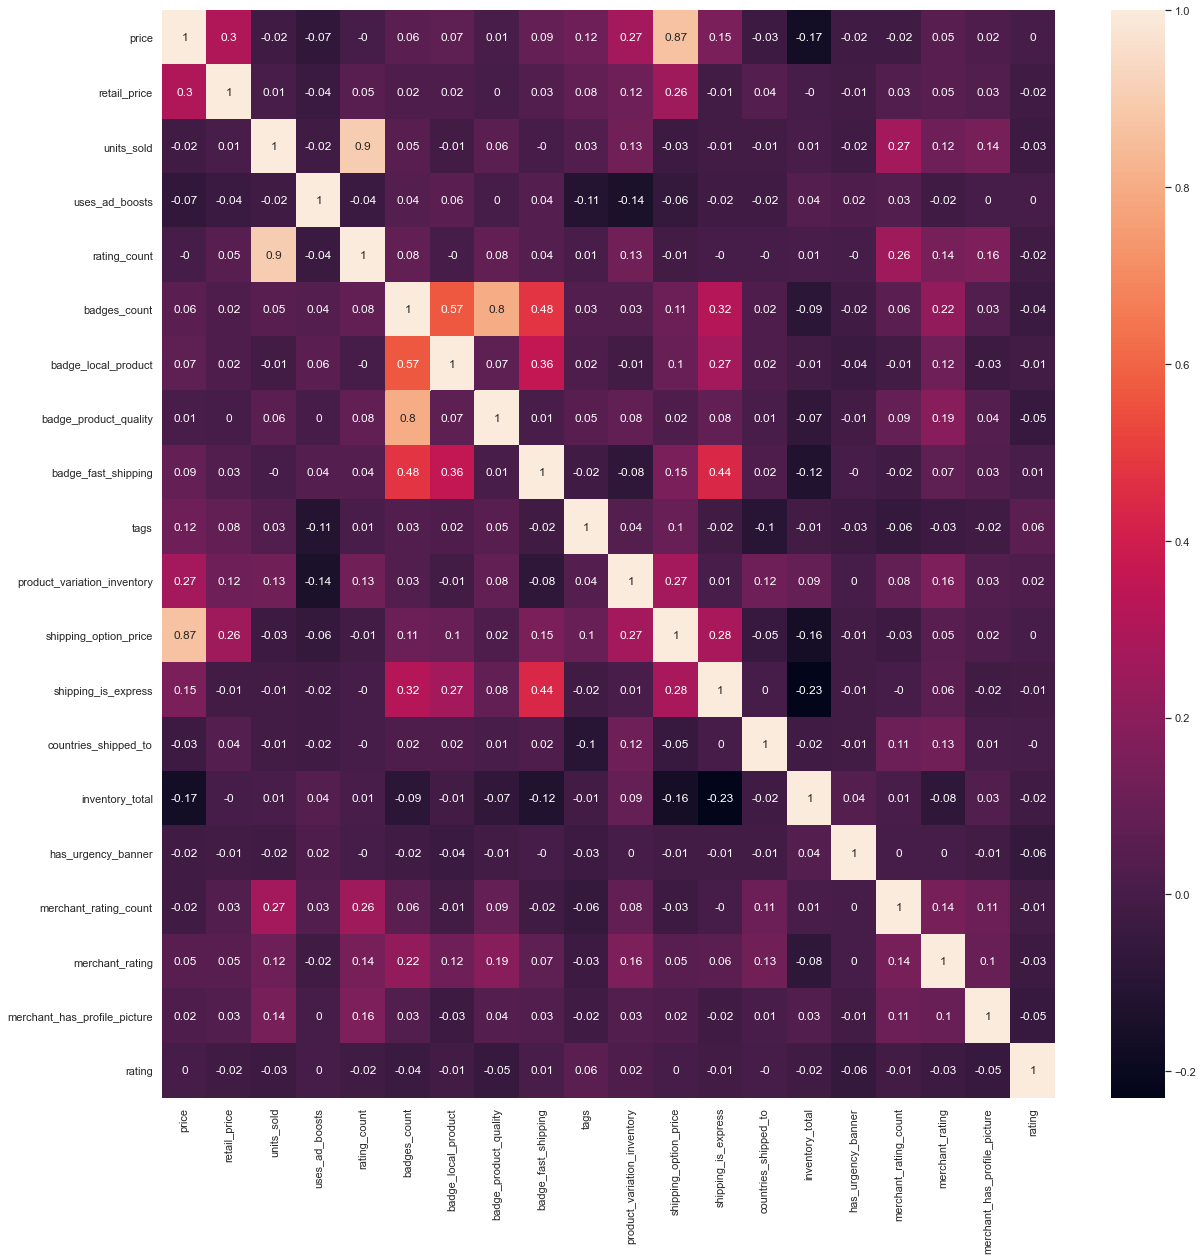

In [15]:
#see correlation heatmap
import seaborn as sns; 
import matplotlib.pyplot as plt

sns.set_theme()
_, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(data = df.corr().round(2), annot =True)

<img src="https://imgur.com/zX3roJ0.png" alt="drawing" width="300" hight="300"/>


# Data Preprocessing <a class="anchor" id="data3"></a>
    . label encoding for Decision Tree
    . Normalization for SVM
    . prepare Numeric data to investegate the usefulness of some useless string data like(names of merchant and title ...etc)

**First the label encoding set:**

In [16]:
#get non `number` keys
str_keys = df.select_dtypes(exclude = 'number').keys()
str_keys

df_le = df.copy() #df_le: DataFrame with label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in str_keys:
    le.fit(df_le[i])
    df_le[i] = le.transform(df_le[i])


**Second the Normalization -needed for SVM- :**
$$
        x_{new} = \frac{x_{old} - \mu}{\sigma}
$$

$ \mu $ is the mean, $\sigma  $ is the standard deviation

note: don't normalize last column(the target)

In [17]:
# Normalization of numeric values only
df_norm = df[df_numeric_keys].copy()    
df_norm.iloc[:,:-1] = (df_norm.iloc[:,:-1] - df_norm.iloc[:,:-1].mean()) / df_norm.iloc[:,:-1].std()

In [18]:
## Normalization of label-Encoded values
df_le_norm = df_le.copy()   
df_le_norm.iloc[:,:-1] = (df_le.iloc[:,:-1] - df_le.iloc[:,:-1].mean()) / df_le.iloc[:,:-1].std()

print(df_norm.shape, df_le_norm.shape)

(1573, 20) (1573, 27)


In [19]:
#Just Numeric Data
df_numeric = df[df_numeric_keys]
df_numeric.shape

(1573, 20)

# Now The model training <a class="anchor" id="t0"></a>
searching for the best model with f1_score

## Trail 0:
model: **Naive Bayes**

Assumption: neglect string/categorical features first

In [20]:
#calling training data without test samples
X = df_numeric[df_numeric['rating']!=99].iloc[:, :-1].values
Y = df_numeric[df_numeric['rating']!=99].iloc[:, -1].values

# split for hold-out
from sklearn.model_selection import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(X,Y, test_size=0.2)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

NB_model = GaussianNB()
NB_model.fit(x_tr, y_tr)

y_hat = NB_model.predict(x_ts)

print(f1_score(y_ts, y_hat, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

0.4429223744292237
f1-score per each class: 
 {1: 1.0, 2: 0.10526315789473684, 3: 0.20408163265306126, 4: 0.6387832699619771, 5: 0.0}


## trying feature selection method:
To improve Naive Bayes

SelektKBest with chi2 adapted from https://stats.stackexchange.com/

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_norm.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features
featureScores = featureScores.nlargest(12,'Score')
featureScores['Specs'].values

                           Specs         Score
16         merchant_rating_count  1.030311e+06
2                     units_sold  6.121540e+05
4                   rating_count  1.457503e+05
1                   retail_price  5.712445e+02
10   product_variation_inventory  1.317332e+02
7          badge_product_quality  1.051987e+02
0                          price  9.872124e+01
5                   badges_count  9.158290e+01
9                           tags  1.972160e+01
11         shipping_option_price  1.914599e+01
13          countries_shipped_to  1.203226e+01
12           shipping_is_express  8.231449e+00
8            badge_fast_shipping  7.631598e+00
18  merchant_has_profile_picture  4.793516e+00
3                 uses_ad_boosts  3.443878e+00


array(['merchant_rating_count', 'units_sold', 'rating_count',
       'retail_price', 'product_variation_inventory',
       'badge_product_quality', 'price', 'badges_count', 'tags',
       'shipping_option_price', 'countries_shipped_to',
       'shipping_is_express'], dtype=object)

In [23]:
#trying top-10 features
# get train sets without test set 
# remeber i used rating =99 for test set
df_chi2_feat = df_norm[df_norm['rating']!=99][['merchant_rating_count', 'units_sold', 'rating_count',
       'retail_price', 'product_variation_inventory',
       'badge_product_quality', 'price', 'badges_count', 'tags',
       'shipping_option_price', 'countries_shipped_to',
       'shipping_is_express',
       'rating']]
X2 = df_chi2_feat.iloc[:, :-1]
Y2 = df_chi2_feat.iloc[:, -1]

x_tr, x_ts, y_tr, y_ts = train_test_split(X2,Y2, test_size=0.2)
model2 = GaussianNB()
model2.fit(x_tr, y_tr)
y_hat2 = model2.predict(x_ts)

print(f1_score(y_ts, y_hat, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

0.3881278538812785
f1-score per each class: 
 {1: 0.0, 2: 0.05405405405405406, 3: 0.18181818181818185, 4: 0.5791505791505791, 5: 0.0}


>>That is even worse!!

## randomly chosen features 
by randomly fitting the model manualy:

So by running some sets of features randomly, i got these to be the most effective in Naive Bayes:

`['price', 'retail_price', 'badges_count', 'badge_product_quality',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'merchant_rating_count', 'merchant_rating']`

In [24]:
#trying best features
# get train sets without test set 
# remeber i used rating =99 for test set
df2 = df_le[df_le['rating']!=99][['price', 'retail_price', 'badges_count', 'badge_product_quality',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'merchant_rating_count', 'merchant_rating',
       'rating']]
X2 = df2.iloc[:, :-1]
Y2 = df2.iloc[:, -1]

x_tr, x_ts, y_tr, y_ts = train_test_split(X2,Y2, test_size=0.2)
model2 = GaussianNB()
model2.fit(x_tr, y_tr)
y_hat2 = model2.predict(x_ts)

print(f1_score(y_ts, y_hat2, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat2, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

0.7214611872146118
f1-score per each class: 
 {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.8364611260053619, 5: 0.1111111111111111}


C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


*YEEEEEEES*     Always trust your instinct :D


**Predict test and save to file**

In [25]:
#re-fit over whole train set
model2.fit(X2,Y2)
# select test data with the rating=99 mask
x_ts = df_le[df_le['rating']==99][['price', 'retail_price', 
                                           'badges_count', 'badge_product_quality',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'merchant_rating_count', 'merchant_rating']].values

y_ts = model2.predict(x_ts)

dummy = pd.DataFrame({'id': test_file['id'],'rating': y_ts})
dummy.to_csv("Naive_bayes_le_v3.csv", index = False)

C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## Trail 1: <a class="anchor" id="t1"></a>
model: **Desicion Trees**
 
Model Configuration: **Label Encode** string values. notice: mus encode train and test sets together

In [26]:
# get train sets without test set 
# remeber i used rating =99 for test set
X = df_le[df_le['rating']!=99].iloc[:, :-1].values
Y = df_le[df_le['rating']!=99].iloc[:, -1].values
x_tr, x_ts, y_tr, y_ts = train_test_split(X,Y, test_size=0.2)

from sklearn.tree import DecisionTreeClassifier


In [27]:
#no special hyperpara
DTmodel = DecisionTreeClassifier()
DTmodel.fit(x_tr, y_tr)
y_hat = DTmodel.predict(x_ts)

#print average f1-score, and all f1/class
print(f1_score(y_ts, y_hat, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

0.6940639269406392
f1-score per each class: 
 {1: 0.0, 2: 0.5714285714285715, 3: 0.43749999999999994, 4: 0.8, 5: 0.4848484848484849}


## Tuning hyperparameters:
I tried tuning the max_depth, 7 had the highest result with hold out

In [28]:
DTmodel = DecisionTreeClassifier(max_depth=7)
DTmodel.fit(x_tr, y_tr)
y_hat = DTmodel.predict(x_ts)

#print average f1-score, and all f1/class
print(f1_score(y_ts, y_hat, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

0.7579908675799086
f1-score per each class: 
 {1: 0.0, 2: 0.6666666666666666, 3: 0.2564102564102564, 4: 0.855421686746988, 5: 0.5614035087719298}


**Predict test results and save to file**

In [29]:
#re-fit the model over entire tain set
DTmodel.fit(X,Y)

# select test data with the rating=99 mask
x_ts = df_le[df_le['rating']==99].iloc[:, :-1].values

y_ts = DTmodel.predict(x_ts)

dummy = pd.DataFrame({'id': test_file['id'],'rating': y_ts})
dummy.to_csv("DTmodel_v2_max_depth.csv", index = False)

## Trail 2: <a class="anchor" id="t2"></a>
model: **Extra Trees Classifier**
"This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting." [sklearn documentaion](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier)

I choses it after searching online

Model Configuration: **Label Encode** string values. notice: mus encode train and test sets together


## Feature selection:
First, lets take a look at best features from `ExtraTreesClassifier`

In [30]:
# get train sets without test set 
# remeber i used rating =99 for test set
X = df_le[df_le['rating']!=99].iloc[:, :-1].values
Y = df_le[df_le['rating']!=99].iloc[:, -1].values

x_tr, x_ts, y_tr, y_ts = train_test_split(X,Y, test_size=0.2)

Index(['merchant_rating', 'rating_count', 'price', 'units_sold', 'tags',
       'merchant_name', 'countries_shipped_to', 'merchant_title',
       'merchant_rating_count', 'product_color', 'retail_price',
       'product_variation_size_id', 'shipping_option_price',
       'product_variation_inventory', 'badge_product_quality'],
      dtype='object')


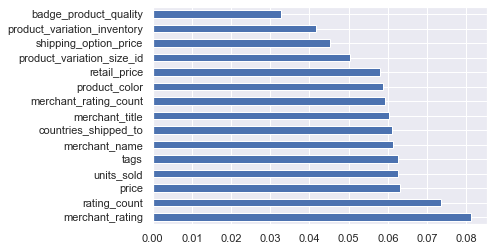

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

ETC_model = ExtraTreesClassifier()
ETC_model.fit(X,Y)

# Taking a look at the best features: 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(ETC_model.feature_importances_, index=df_le.iloc[:,0:-1].columns)
feat_importances.nlargest(15).plot(kind='barh')

print(feat_importances.nlargest(15).index)
plt.show()

**Now**, train the model with hold out to test performance, and try different hyperparameters. 

In [32]:
# new model to use Hold out
ETC_model = ExtraTreesClassifier()
ETC_model.fit(x_tr,y_tr)
y_hat = ETC_model.predict(x_ts)
                 
#print average f1-score, and all f1/class
print(f1_score(y_ts, y_hat, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

0.7625570776255708
f1-score per each class: 
 {1: 1.0, 2: 0.4, 3: 0.43902439024390244, 4: 0.8495575221238938, 5: 0.47058823529411764}


## Try Extra Trees Classifier with only the top features:
use Grid Search to tune feature numbers and n_estimators


In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [20,30,40],
             'max_depth': [10, 11, 13, 15,17]}
GS = GridSearchCV(ETC_model, parameters, cv = 7)
GS.fit(X,Y) 

print(f'Best parameters are: {GS.best_params_}')

C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=7.
  warnings.warn(


Best parameters are: {'max_depth': 17, 'n_estimators': 40}


In [34]:
# get the highest features from above
select_feat = [ 'merchant_rating', 'rating_count', 'price', 'tags', 'merchant_name',
       'units_sold', 'retail_price', 'product_color', 'countries_shipped_to',
       'merchant_title', 'merchant_rating_count', 'product_variation_size_id',
       'shipping_option_price', 'product_variation_inventory',
       'badge_product_quality']

# get train sets
X = df_le[df_le['rating']!=99].loc[:, select_feat].values
Y = df_le[df_le['rating']!=99].iloc[:, -1].values
x_tr, x_ts, y_tr, y_ts = train_test_split(X, Y, test_size = 0.2)


In [35]:
# model with the previous hyperparameters
ETC_model = ExtraTreesClassifier(n_estimators=40, max_depth=15)
ETC_model.fit(x_tr,y_tr)
y_h = ETC_model.predict(x_ts)

#print average f1-score, and all f1/class
print(f1_score(y_ts, y_hat, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

0.634703196347032
f1-score per each class: 
 {1: 0.0, 2: 0.6666666666666666, 3: 0.0588235294117647, 4: 0.7838616714697407, 5: 0.03773584905660377}


>>the score got lower after tuning hyperparas with GridSearch?!

## Conclusion:
tuning Hyperparameters in `ExtraTreesClassifier` have no effect, it is already a well-set classifier.


<img src="https://imgur.com/JiFe0lf.png" alt="drawing" width="500" hight="500"/>


since feature selection reduced the score>> refit the model with full features then:
**Predict test results and save to file**

In [36]:
# re-fetch data with full features
# remeber i used rating =99 for test set
X = df_le[df_le['rating']!=99].iloc[:, :-1].values
Y = df_le[df_le['rating']!=99].iloc[:, -1].values

x_tr, x_ts, y_tr, y_ts = train_test_split(X,Y, test_size=0.2)

#re-fit the model over entire tain set
ETC_model.fit(X,Y)
x_ts = df_le[df_le['rating']==99].iloc[:, :-1].values
    
y_ts = ETC_model.predict(x_ts)
dummy = pd.DataFrame({'id': test_file['id'],'rating': y_ts})
dummy.to_csv("ExtraTreesClassifier_le_v2.csv", index = False)


## Trail 3: <a class="anchor" id="t3"></a>
model: **SVM**

Model Configuration: **Normalization**. notice: must norm train and test sets together

Use GricSearch to find the best SVM model of kernel and Penalty and degree


In [37]:
# get train sets without test set 
# remeber i used rating =99 for test set
X = df_le_norm[df_le_norm['rating']!=99].iloc[:, :-1].values
Y = df_le_norm[df_le_norm['rating']!=99].iloc[:, -1].values
x_tr, x_ts, y_tr, y_ts = train_test_split(X, Y, test_size = 0.2)

# Applying Grid Search
to find best parameters for the svm

In [38]:
import sklearn.svm as svm
from sklearn.model_selection import GridSearchCV

SVM_model = svm.SVC()
#parameters set that grid search will explore
parameters = {'kernel': ['rbf','poly', 'linear'],
             'C': [0.7, 0.8 ,0.9 ,1.0],
             'degree' : [2,3,4,5]}
#grid search with cross-validation = 7
GS = GridSearchCV(SVM_model, parameters, cv = 7)
GS.fit(X,Y) 

print(f'Best parameters are: {GS.best_params_}')

GS.cv

C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=7.
  warnings.warn(


Best parameters are: {'C': 0.7, 'degree': 2, 'kernel': 'poly'}


7

In [39]:
# >>   SVC with 2rd degree poynomial 
SVM_model = svm.SVC(kernel='poly', degree=2, C = 0.7)
SVM_model.fit(x_tr, y_tr)
y_hat = SVM_model.predict(x_ts)

#print average f1-score, and all f1/class
print(f1_score(y_ts, y_hat, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

0.684931506849315
f1-score per each class: 
 {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.807799442896936, 5: 0.2380952380952381}



**Predict test results and save to file**

In [40]:
#re train over entire train set
SVM_model.fit(X, Y)

x_ts = df_le_norm[df_le_norm['rating']==99].iloc[:, :-1].values
    
y_ts = SVM_model.predict(x_ts)
dummy = pd.DataFrame({'id': test_file['id'],'rating': y_ts})
dummy.to_csv("SVM_le_norm_v3.csv", index = False)
   # header=['Category'], index_label='Id')

# More: Bagging and Stacking tecnique: <a class="anchor" id="more"></a>
* bagging the Extra trees Classifier. It sounds dumb to bag a bag of classifiers, but lets try it :D

In [41]:
# get train sets without test set 
# remeber i used rating =99 for test set
X = df_le[df_le['rating']!=99].iloc[:, :-1].values
Y = df_le[df_le['rating']!=99].iloc[:, -1].values
x_tr, x_ts, y_tr, y_ts = train_test_split(X,Y, test_size=0.2)

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

clf = BaggingClassifier(base_estimator=ExtraTreesClassifier(), n_estimators=10, random_state=0)
clf.fit(x_tr, y_tr)
y_hat = clf.predict(x_ts)

#print average f1-score, and all f1/class
print(f1_score(y_ts, y_hat, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

0.7579908675799086
f1-score per each class: 
 {1: 0.0, 2: 0.6666666666666666, 3: 0.1714285714285714, 4: 0.8539325842696629, 5: 0.4651162790697674}


* of course baging a bag of classifiers won't do any good.
<img src="https://imgur.com/8JzQGt8.png" alt="drawing" width="300" hight="200"/>

**but i will predict and save results any way :D**

In [43]:
#re train over entire train set
clf.fit(X, Y)

x_ts = df_le_norm[df_le_norm['rating']==99].iloc[:, :-1].values
    
y_ts = clf.predict(x_ts)
dummy = pd.DataFrame({'id': test_file['id'],'rating': y_ts})
dummy.to_csv("SVM_le_norm_bagging_v4.csv", index = False)
   # header=['Category'], index_label='Id')

## Stacking  both:
lets stack the Extra Trees Classifier with the SVM and use logistic regresstion at the final estimator,



In [44]:
# get train sets without test set 
# remeber i used rating =99 for test set
X = df_le[df_le['rating']!=99].iloc[:, :-1].values
Y = df_le[df_le['rating']!=99].iloc[:, -1].values
x_tr, x_ts, y_tr, y_ts = train_test_split(X,Y, test_size=0.2)

In [45]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
 ('ETC', ExtraTreesClassifier()),
    ('svm', svm.SVC())]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(x_tr, y_tr)
y_hat = clf.predict(x_ts)

#print average f1-score, and all f1/class
print(f1_score(y_ts, y_hat, average='micro'))
labels = [1,2,3,4,5]
f1_scores = f1_score(y_ts, y_hat, average=None, labels=labels, zero_division=True)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
print('f1-score per each class:','\n', f1_scores_with_labels)

C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.7716894977168951
f1-score per each class: 
 {1: 1.0, 2: 1.0, 3: 0.42857142857142855, 4: 0.864406779661017, 5: 0.35714285714285715}


C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
#re train over entire train set
clf.fit(X, Y)

x_ts = df_le_norm[df_le_norm['rating']==99].iloc[:, :-1].values
    
y_ts = clf.predict(x_ts)
dummy = pd.DataFrame({'id': test_file['id'],'rating': y_ts})
dummy.to_csv("Stacking_all.csv", index = False)

C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\asmaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# more over: Balancing Data <a class="anchor" id="resample_data"></a>

adding samples for the low-samlped classes

code is from [website](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

In [47]:
#check class distribution
# count of samples in each class
d = pd.DataFrame( np.unique( Y, return_counts=True), index = ['rate', 'count'])
d = d.transpose()
d

,rate,count
0,1.0,2.0
1,2.0,12.0
2,3.0,135.0
3,4.0,774.0
4,5.0,171.0


In [48]:
# get train sets
X = df_le_norm[df_le_norm['rating']!=99].iloc[:, :-1]
Y = df_le_norm[df_le_norm['rating']!=99].iloc[:, -1]
x_tr, x_ts, y_tr, y_ts = train_test_split(X,Y, test_size=0.2)

### don't bother, this part of code is not completed:

In [49]:
from sklearn.utils import resample

# # Separate input features and target

# # setting up testing and training sets
# # concatenate our training data back together

# separate minority and majority classes

rate_class = []
for i in range(len(d['rate'])):

    rate_class.append(df_le_norm[df_le_norm['rating']== d['rate'][i]]) 
    
#upsample minority
for i in range (len(d['rate'])):
    rate_upsampled = resample(rate_class[i],
                          replace=True, # sample with replacement
                          n_samples=d['count'].nlargest(1), # match number in majority class
                          random_state=27) # reproducible results

# # combine majority and upsampled minority
# unsampled = pd.DataFrame()
# for i in range(len(d['rate'])):
#     upsampled = pd.append(rate[i])

# # check new class counts
# upsampled['rating'].value_counts()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().